# TUTORIAL <span style="color:orange;">***MASAÏ***</span><img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.png" />

Back to the main [Index](Index.ipynb)

## Part 4. 2D spectra processing and plotting

### Various imports and graphics settings

In [1]:
from __future__ import print_function

### Loading the <span style="color:orange;">***MASAÏ***</span> library

In [2]:
from masai.api import *

//anaconda/envs/python27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


MASAI api loaded: version 0.2.4.1

The current directory is </Users/christian/Dropbox/PycharmProjects/masai/doc/tutorial>
MASAI root directory is </Users/christian/Dropbox/PycharmProjects/masai>


#### Set up the general location of data

In [3]:
import os
# You should set the MASAI environnement variable before running these exemples')
# or change the two following paths according to your installation
DATADIR = os.path.join(MASAI,'doc/tutorial/exemples')
FIGDIR = os.path.join(MASAI,'doc/tutorial/figures')

## Load a 2D fid

In [4]:
user = 'user'
name = 'HMQC'
expno = 31
path = os.path.join(DATADIR, user,'nmr',name, str(expno))
source = Bruker(path) 
source

***Bruker Source***
- path: /Users/christian/Dropbox/PycharmProjects/masai/doc/tutorial/exemples/user/nmr/HMQC/31
- datatype: 2D NMR SER
- pulse program: HMQC2md
- Encoding: STATES-TPPI
- TD1: 1024, TD2: 1024
- F1 limits: 0.00 to 7.067 ms
- F2 limits: 0.00 to 49.104 ms

***Display of the first 5 rows***

In [5]:
source.real.head()

0.000     0.048     0.096     0.144     0.192     0.240     0.288   \
0.000  0.062191  0.146668 -0.143390  0.273971  0.176294 -0.013268  0.148825   
0.037 -0.003312 -0.001535  0.298947  0.328387 -0.122952  0.137279 -0.145944   
0.074 -0.059694 -0.087524  0.168179  0.232109  0.142184  0.197666  0.014069   
0.111 -0.056855  0.117415  0.153030 -0.391067 -0.214901 -0.137140  0.162347   
0.148  0.016967  0.101250  0.095071  0.258237  0.212456  0.135329 -0.033818   

         0.336     0.384     0.432    ...    48.672  48.720  48.768  48.816  \
0.000 -0.028587  0.141678 -0.105890   ...       0.0     0.0     0.0     0.0   
0.037 -0.112018  0.094728  0.134130   ...       0.0     0.0     0.0     0.0   
0.074  0.022534 -0.096844  0.131396   ...       0.0     0.0     0.0     0.0   
0.111 -0.075645  0.143149  0.004188   ...       0.0     0.0     0.0     0.0   
0.148 -0.028811 -0.108342 -0.017514   ...       0.0     0.0     0.0     0.0   

       48.864  48.912  48.960  49.008  49.056  49.104  
0.000     0.0     0.0     0.0     0.0     0.0     0.0  
0.037     0.0     0.0     0.0     0.0     0.0     0.0  
0.074     0.0     0.0     0.0     0.0     0.0     0.0  
0.111     0.0     0.0     0.0     0.0     0.0     0.0  
0.148     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 1024 columns]

## Plot a 2D ser

<IPython.core.display.Javascript object>


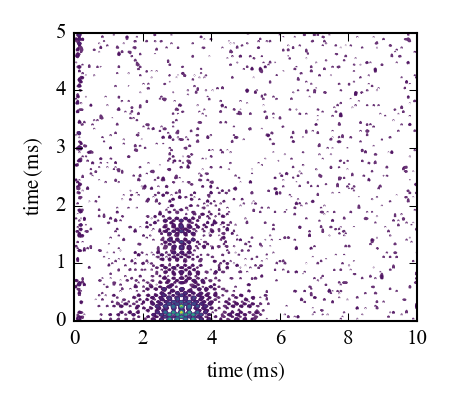

In [13]:
source = Bruker(path) 
p_2 = Plot2d(source, figsize=(3,2.7), xlim=(0, 10), ylim=(0, 5), 
             nc=20, exponent=1.5, start=-.0, cmap='viridis')  

## Process SER data

The sequence is HMQC with a full echo ajusted with the delay D6.
```
 ...
(p1 ph1):f1
 d6
(p11 ph11):f3
 d0
(p2 ph2):f1
 d0 
(p11 ph12):f3 
 go=2 ph31
 ...
```
We will thus make a shifted apodization of the spectrum according to D6 

Exponential apodization lb:120.00


<IPython.core.display.Javascript object>


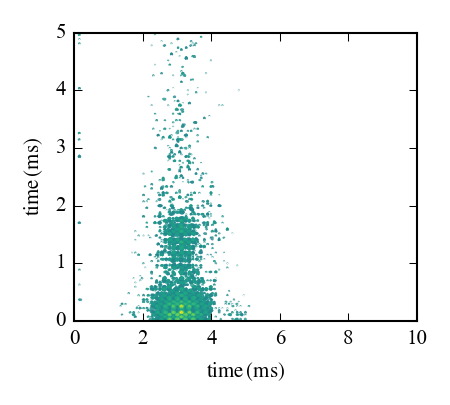

In [14]:
source = Bruker(path) 
d6 = source.par.D[6]*1e3 # in ms
Process(source, transform = 'em 120 --shifted %.3f'%d6)
p_2 = Plot2d(source, figsize=(3,2.7), xlim=(0, 10), ylim=(0, 5),
            cmap='viridis')

** Rephasing due to full-echo: **


For shifting time $\mathrm{t_0}$, if  $\mathrm{h(t)=f(t-t_0)}$,  then  $\mathrm{\hat{h}(\nu) = e^{-i\,2\pi \,t_0\,\nu } \hat{f}(\nu)}$

where the function $\mathrm{\hat{f}}$ is the Fourier transform (ft) of the function $\mathrm{f}$.

The necessary phase for rephasing is thus $\mathrm{p1 = 360 * \frac{d6}{dw}}$

Exponential apodization lb:50.00
Zero-filling to si:1024
Fourier transform with si:1024
Phasing phc0:0.00, phc1:23239.96


<IPython.core.display.Javascript object>


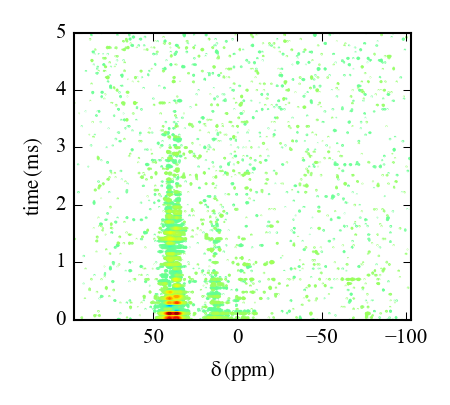

In [15]:
source = Bruker(path) 

d6 = source.par.D[6]*1.e3 # in ms
sw = source.par.SW_h
dw = 1000./sw # en ms
p1 = 360. * d6 / dw 

Process(source, transform = 'em 50 --shifted %.3f'%d6)
Process(source, transform = 'zf 0') 
Process(source, transform = 'ft')
Process(source, transform = 'pk 0 %.3f'%p1)

p_2 = Plot2d(source, figsize=(3,2.7), ylim=(0, 5))

here we display row 0 and 1

taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


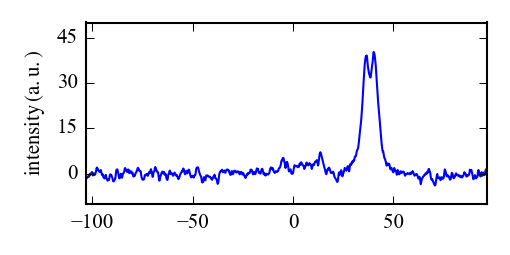

taking horizontal (axis=1) section by index at index 1


<IPython.core.display.Javascript object>


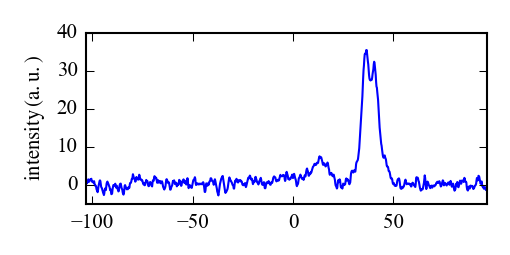

In [16]:
row = source.get_row(0, byindex=True)
p_2 = Plot1d(row)
row = source.get_row(1, byindex=True)
p_1 = Plot1d(row)

Instead of calculating the phasing, we can also use the `shifted` flag.

Exponential apodization lb:50.00
Zero-filling to si:1024
Fourier transform with si:1024
Auto-phasing :  phc0 = 18.179, phc1 = -9.492


<IPython.core.display.Javascript object>


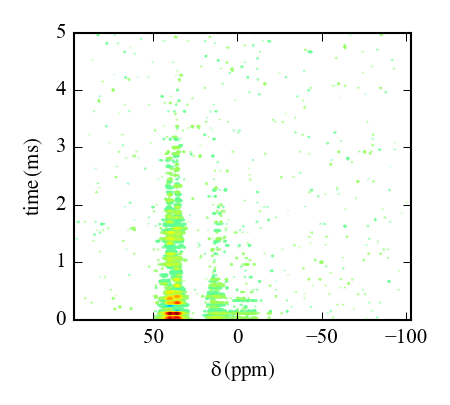

In [17]:
source = Bruker(path) 

d6 = source.par.D[6]*1.e3 # in ms

Process(source, transform = 'em 50 --shifted %.3f'%d6)
Process(source, transform = 'zf 0') 
Process(source, transform = 'ft')
Process(source, transform = 'pk 0 0 --auto --fit_phc1 --pivot 38.4 --shifted %.3f'%d6)

p_2 = Plot2d(source, figsize=(3,2.7), ylim=(0, 5))

#### Save this figure

In [18]:
filename = os.path.join(FIGDIR, 'spec2d_1.png')
p_2.savefig(savename=filename)

The next step is to perfom a transform in the second dimension 
taking into account the fact that the data are ecquired with the STATES protocols

Exponential apodization lb:20.00
Zero-filling to si:256
Data transform according to encoding STATES-TPPI
Fourier transform with si:1024
Auto-phasing :  phc0 = 22.553, phc1 = 0.010


<IPython.core.display.Javascript object>


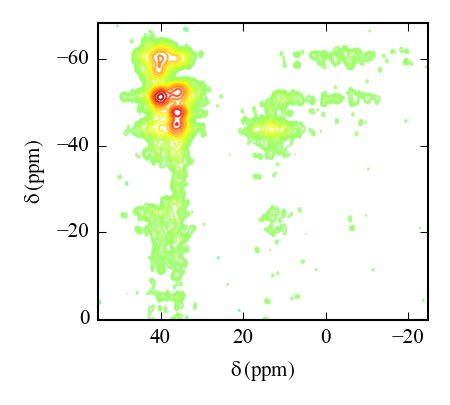

taking horizontal (axis=1) section by position from -21.41 to -20.43


<IPython.core.display.Javascript object>


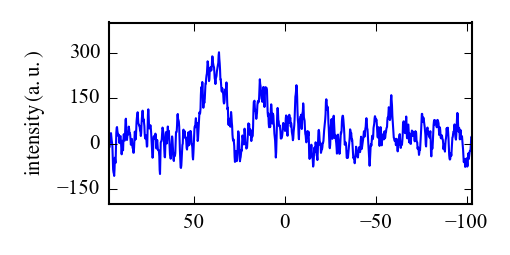

In [19]:
Process(source, axis=0, transform='em 20')
Process(source, axis=0, transform='zf 0') 
Process(source, axis=0, transform='ft')
Process(source, axis=0, transform='pk 180 0 --auto --fit_phc1 --select cols')

p_2 = Plot2d(source, figsize=(3,2.7))

row = source.get_row(-20.87,width=1.)
p_1 = Plot1d(row, reverse=True)

Back to the main [Index](Index.ipynb)